In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# data set, set features and target
data=pd.read_csv('Apple_data_3years.csv')

features= data[['Open','High','Low','Volume']]


target=data['Close'];target=target.astype(float)
target=data['Close']



# rise or drop
data['change'] = data['Close']-data['Open']
data['up']= data['change']
data['up'][data['change']>=0] = 1
data['up'][data['change']<0] = -1
target1 = data['up']


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_19836\846629641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']>=0] = 1
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_19836\846629641.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['up'][data['change']<0] = -1


In [3]:
#数据归一化处理
min_max_scaler = preprocessing.MinMaxScaler()#X_scaled = (X - X_min) / (X_max - X_min)
features = min_max_scaler.fit_transform(features)#两列数据转化
 

In [4]:
#数据集划分
split_num=int(len(features)*0.80)
X_train=features[:split_num]
Y_train=target[:split_num]
X_test=features[split_num:]
Y_test=target[split_num:]

Y_train1=target1[:split_num]
Y_test1=target1[split_num:]

# 2. price prediction

In [5]:
def cross_val(model, X, Y):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

In [6]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

## 1.logistics

In [7]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train1)

test_proba = log_reg.predict_proba(X_test)
train_proba = log_reg.predict_proba(X_train)

test_pred = np.where(test_proba[:, 1] > 0.5, 1, 0)
train_pred = np.where(train_proba[:, 1] > 0.5, 1, 0)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)


Test set evaluation:
_____________________________________
MAE: 0.4146341463414634
MSE: 0.4146341463414634
RMSE: 0.6439209162167846
R2 Square: -0.6948328267477202
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.45102040816326533
MSE: 0.45102040816326533
RMSE: 0.6715805299167519
R2 Square: -0.8138724644478315
__________________________________


In [8]:
np.unique(Y_test1)

array([0., 1.])

In [9]:
np.unique(test_pred)

array([0, 1])

In [10]:
#test_pred = np.where(test_pred == 0, -1, 1)
#cal(Y_test1, test_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
accuracy = accuracy_score(Y_test1, test_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)
accuracy = accuracy_score(Y_train1, train_pred)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, test_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, test_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.4146341463414634
MSE: 0.4146341463414634
RMSE: 0.6439209162167846
R2 Square: -0.6948328267477202
__________________________________
Test set Accuracy: 0.5853658536585366
Train set evaluation:
_____________________________________
MAE: 0.45102040816326533
MSE: 0.45102040816326533
RMSE: 0.6715805299167519
R2 Square: -0.8138724644478315
__________________________________
Train set Accuracy: 0.5489795918367347
Confusion Matrix:
[[  3 102]
 [  0 141]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06       105
         1.0       0.58      1.00      0.73       141

    accuracy                           0.59       246
   macro avg       0.79      0.51      0.39       246
weighted avg       0.76      0.59      0.44       246



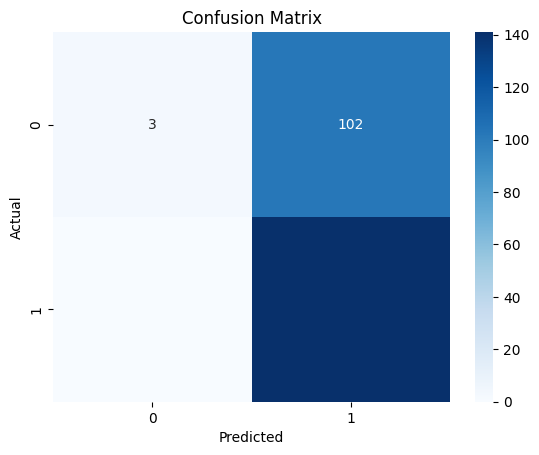

In [11]:
confusion = confusion_matrix(Y_test1, test_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

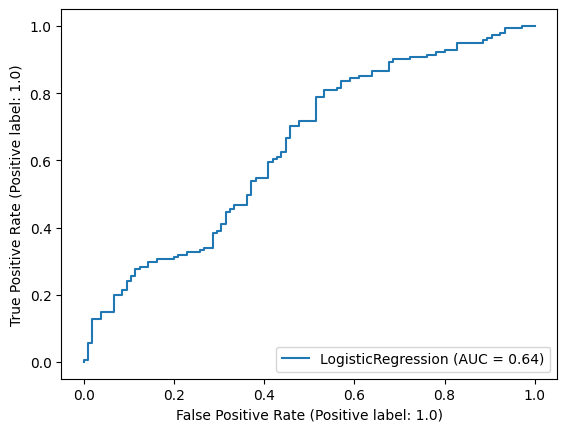

In [12]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test,Y_test1)


###Prediction error (MAE, MSE, RMSE): The model's prediction error (Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error) is relatively high on both the test and training sets. This indicates that the model's predictions deviate quite a bit from the actual values.

R2 score: The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R2 scores for the model on the test and training sets are -0.69 and -0.81, respectively. A negative R2 score indicates that the model is performing worse than a horizontal line, suggesting a poor fit to the data.

Accuracy: Accuracy is the proportion of true results (both true positives and true negatives) in the total number of cases examined. The model has an accuracy of 58.5% on the test set and 54.9% on the training set, which suggests that it correctly predicts slightly more than half of the cases.

Confusion matrix and Classification report: The confusion matrix and classification report provide a more detailed view of the model's performance. The model has a precision of 1.00 and recall of 0.03 for predicting "falls" (0), indicating that while all predictions of "falls" were correct, it only identified 3% of the actual "falls". For predicting "rises" (1), it has a precision of 0.58 and recall of 1.00, suggesting that the model identified all actual "rises", but also incorrectly predicted "rises" for a number of cases which were actually "falls".

AUC: AUC stands for "Area under the ROC Curve", which measures the entire two-dimensional area underneath the entire ROC curve (from (0,0) to (1,1)). The model has an AUC of 0.64, which is slightly better than a random predictor (AUC=0.5), but still leaves room for improvement.

In summary, the Logistic Regression model has some limitations in predicting stock price increases or decreases. It seems to be biased towards predicting "rises", and struggles with accurately identifying "falls". This could be due to an imbalance in the data, or it might indicate that the model needs further tuning or more informative features to improve its performance.

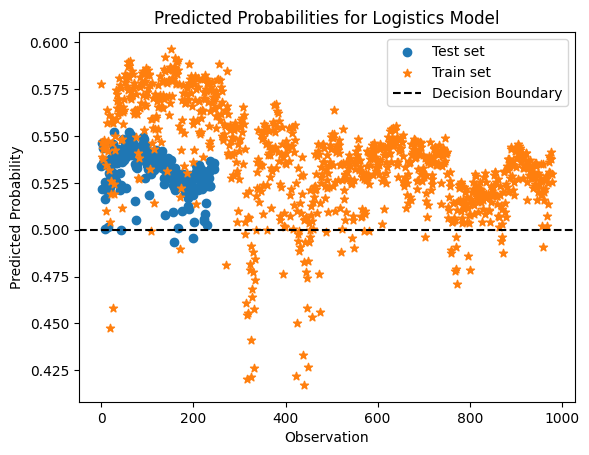

In [13]:
# logistics visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)
test_index = np.arange(len(test_proba))
train_index = np.arange(len(train_proba))

test_pred_series = pd.Series(test_proba[:, 1], index=test_index)
train_pred_series = pd.Series(train_proba[:, 1], index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Logistics Model')
plt.legend()
plt.show()

## 2.probit

In [14]:
Y_train1[Y_train1==-1]=0
Y_test1[Y_test1==-1]=0

probit_model = sm.Probit(Y_train1, X_train)
probit_result = probit_model.fit()

test_pred = probit_result.predict(X_test)
train_pred = probit_result.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, train_pred)

Optimization terminated successfully.
         Current function value: 0.415453
         Iterations 7
Test set evaluation:
_____________________________________
MAE: 0.20390907155552976
MSE: 0.10255282574197938
RMSE: 0.320238701193312
R2 Square: 0.5808114283957025
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.27093429815541054
MSE: 0.12816431134609818
RMSE: 0.35800043484065514
R2 Square: 0.4845605407916421
__________________________________


In [15]:
threshold = 0.5
binary_pred = np.where(test_pred > threshold, 1, 0)
binary_pred_train= np.where(train_pred > threshold, 1, 0)

In [16]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test1, binary_pred)
accuracy = accuracy_score(Y_test1, binary_pred)
print("Test set Accuracy:", accuracy)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train1, binary_pred_train)
accuracy = accuracy_score(Y_train1, binary_pred_train)
print("Train set Accuracy:", accuracy)
 
confusion = confusion_matrix(Y_test1, binary_pred)
print("Confusion Matrix:")
print(confusion)

report = classification_report(Y_test1, binary_pred)
print("Classification Report:")
print(report)

Test set evaluation:
_____________________________________
MAE: 0.15447154471544716
MSE: 0.15447154471544716
RMSE: 0.3930286817974576
R2 Square: 0.3685916919959473
__________________________________
Test set Accuracy: 0.8455284552845529
Train set evaluation:
_____________________________________
MAE: 0.1683673469387755
MSE: 0.1683673469387755
RMSE: 0.41032590332414487
R2 Square: 0.3228756637242258
__________________________________
Train set Accuracy: 0.8316326530612245
Confusion Matrix:
[[ 90  15]
 [ 23 118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       105
         1.0       0.89      0.84      0.86       141

    accuracy                           0.85       246
   macro avg       0.84      0.85      0.84       246
weighted avg       0.85      0.85      0.85       246



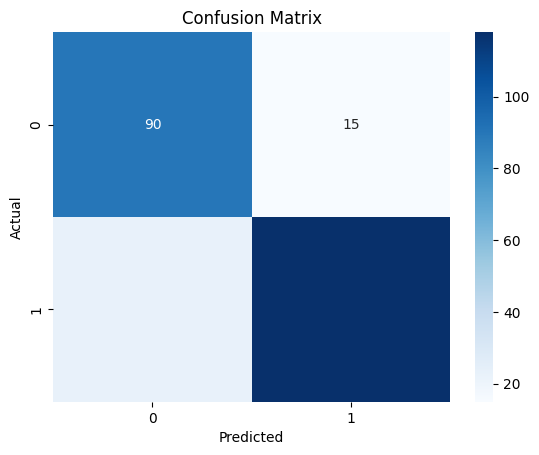

In [17]:
confusion = confusion_matrix(Y_test1, binary_pred)

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

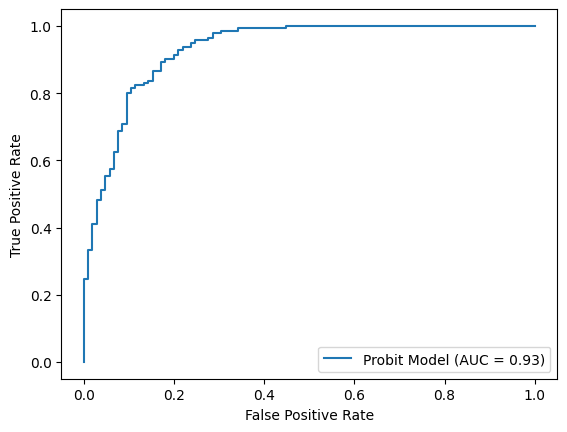

In [18]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, _ = roc_curve(Y_test1, test_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Probit Model')
roc_display.plot()

###Prediction error (MAE, MSE, RMSE): The model's prediction error (Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error) is relatively low on both the test and training sets, which indicates that the model's predictions are fairly accurate.

R2 score: The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R2 scores for the model on the test and training sets are 0.37 and 0.32, respectively. This means that the model can explain around 32% to 37% of the variance in the target variable.

Accuracy: Accuracy is the proportion of true results (both true positives and true negatives) in the total number of cases examined. The model has an accuracy of 84.6% on the test set and 83.2% on the training set, which suggests that it correctly predicts the majority of cases.

Confusion matrix and Classification report: The confusion matrix and classification report provide a more detailed view of the model's performance. The model has a precision of 0.80, recall of 0.86, and F1 score of 0.83 for predicting "falls" (0), and a precision of 0.89, recall of 0.84, and F1 score of 0.86 for predicting "rises" (1). This indicates that the model performs quite well in predicting both "rises" and "falls".

AUC: AUC stands for "Area under the ROC Curve", which measures the entire two-dimensional area underneath the entire ROC curve (from (0,0) to (1,1)). The model has an AUC of 0.93, which is a great score and suggests that the model has a high ability to distinguish between "rises" and "falls".

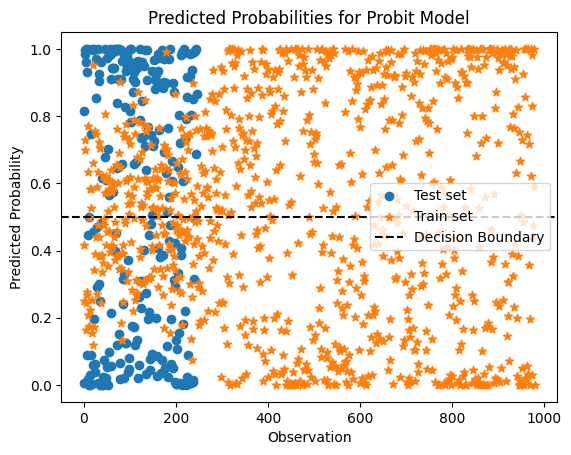

In [19]:
# probit visual
#sns.set(font_scale=1.2)
#plt.rcParams['font.sans-serif'] = 'SimHei'
#plt.rcParams['axes.unicode_minus'] = False
#plt.rc('font', size=6)

# Create index for test_pred and train_pred
test_index = np.arange(len(test_pred))
train_index = np.arange(len(train_pred))

# Convert test_pred and train_pred to pandas Series
test_pred_series = pd.Series(test_pred, index=test_index)
train_pred_series = pd.Series(train_pred, index=train_index)

# Plotting the predicted probabilities
plt.scatter(test_pred_series.index, test_pred_series.values, marker='o', label='Test set')
plt.scatter(train_pred_series.index, train_pred_series.values, marker='*', label='Train set')
plt.axhline(y=0.5, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Observation')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities for Probit Model')
plt.legend()
plt.show()